# Plot Functions

In [2]:
# imports 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

In [5]:
# Define Assumptions - period & company

company = 'TSLA'

stock = yf.Ticker(company)
data = stock.history(period='2Y')
company_name = stock.info['longName']

# Create a list to loop over Multiple companies

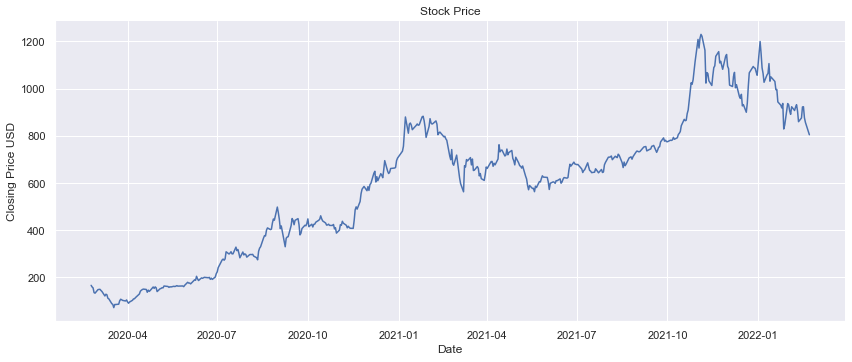

In [15]:
sns.relplot(
    data=data, 
    x="Date", y="Close",
    height=5, aspect = 2.4, 
    kind="line"
).set(
    title="Stock Price", 
    ylabel="Closing Price USD",
    xlabel="Date"
)

In [7]:
# Add MA formula to the dataframe

moving_avg_days = [7, 20, 50]

for ma in moving_avg_days:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(ma).mean()

In [8]:
sns.set(rc={"figure.figsize":(15, 5)})
ax = sns.lineplot(x='Date', y='Close', data=data)
ax1 = sns.lineplot(x='Date', y='MA for 7 days', data=data)
ax2 = sns.lineplot(x='Date', y='MA for 20 days', data=data)
ax3 = sns.lineplot(x='Date', y='MA for 50 days', data=data)
ax.legend(labels=['Close','7 Day MA','20 Day MA', '50 Day MA'])

In [9]:
data['Daily Return'] = data['Close'].pct_change()

Text(0.5, 1.0, 'Tesla, Inc.')

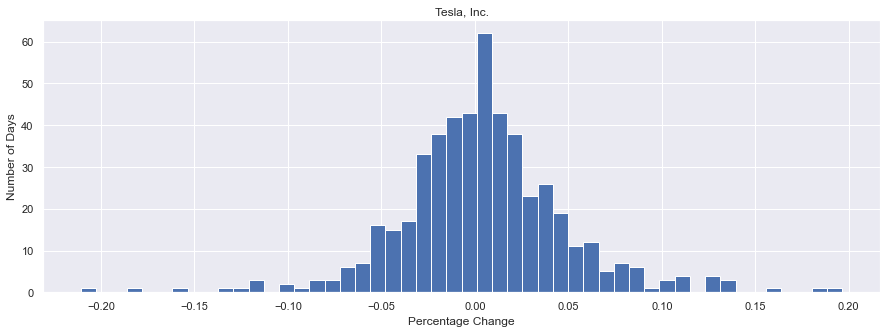

In [14]:
plt.figure(figsize=(15, 5))
data['Daily Return'].hist(bins=50)
plt.ylabel('Number of Days')
plt.xlabel('Percentage Change')
plt.title(company_name)

In [11]:
data

Open        High         Low       Close     Volume  \
Date                                                                    
2020-02-24  167.800003  172.699997  164.440002  166.757996   75961000   
2020-02-25  169.800003  171.320007  157.399994  159.981995   86452500   
2020-02-26  156.500000  162.662003  155.222000  155.759995   70427500   
2020-02-27  146.000000  147.953995  133.800003  135.800003  121386000   
2020-02-28  125.940002  138.104004  122.304001  133.598007  121114500   
...                ...         ...         ...         ...        ...   
2022-02-15  900.000000  923.000000  893.380005  922.429993   19216500   
2022-02-16  914.049988  926.429993  901.210022  923.390015   17098100   
2022-02-17  913.260010  918.500000  874.099976  876.349976   18392800   
2022-02-18  886.000000  886.869995  837.609985  856.979980   22710500   
2022-02-22  834.130005  856.729980  803.120117  804.789978   18199915   

            Dividends  Stock Splits  MA for 7 days  MA for 20 days  \
Date                                                                 
2020-02-24          0           0.0            NaN             NaN   
2020-02-25          0           0.0            NaN             NaN   
2020-02-26          0           0.0            NaN             NaN   
2020-02-27          0           0.0            NaN             NaN   
2020-02-28          0           0.0            NaN             NaN   
...               ...           ...            ...             ...   
2022-02-15          0           0.0     903.440002      915.462500   
2022-02-16          0           0.0     905.732858      911.849500   
2022-02-17          0           0.0     899.211426      905.853497   
2022-02-18          0           0.0     888.494280      901.507495   
2022-02-22          0           0.0     874.242850      895.246994   

            MA for 50 days  Daily Return  
Date                                      
2020-02-24             NaN           NaN  
2020-02-25             NaN     -0.040634  
2020-02-26             NaN     -0.026390  
2020-02-27             NaN     -0.128146  
2020-02-28             NaN     -0.016215  
...                    ...           ...  
2022-02-15      987.996595      0.053291  
2022-02-16      986.284196      0.001041  
2022-02-17      982.776195     -0.050943  
2022-02-18      978.536595     -0.022103  
2022-02-22      974.556395     -0.060900  

[505 rows x 11 columns]

In [ ]:
# Plot the data
train = data_train[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()